# **Spotify 2023: um estudo de análise exploratória de dados**

# 1. Importando bibliotecas

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Lendo arquivo

In [80]:
# leitura do arquivo
spotify = pd.read_csv("spotify.csv", encoding='latin-1')

# mostra 5 primeiras linhas
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# 3. Renomeando coluna do nome dos artistas

In [89]:
# renomeando colunas que vou usar
spotify = spotify.rename(columns={'artist(s)_name': 'nomeArtista'})
spotify = spotify.rename(columns={'track_name': 'nomeMusica'})
spotify = spotify.rename(columns={'released_year': 'anoLancamento'})

# removendo linhas vazias
spotify = spotify.dropna()

# listando os 10 artistas mais citados
spotify['nomeArtista'].value_counts().head(10)


,count
nomeArtista,
Taylor Swift,29
SZA,17
Bad Bunny,16
The Weeknd,15
Kendrick Lamar,12
Harry Styles,12
Morgan Wallen,9
Feid,8
"Drake, 21 Savage",7


# 4. Plotando visualização dos 10 artistas com mais músicas

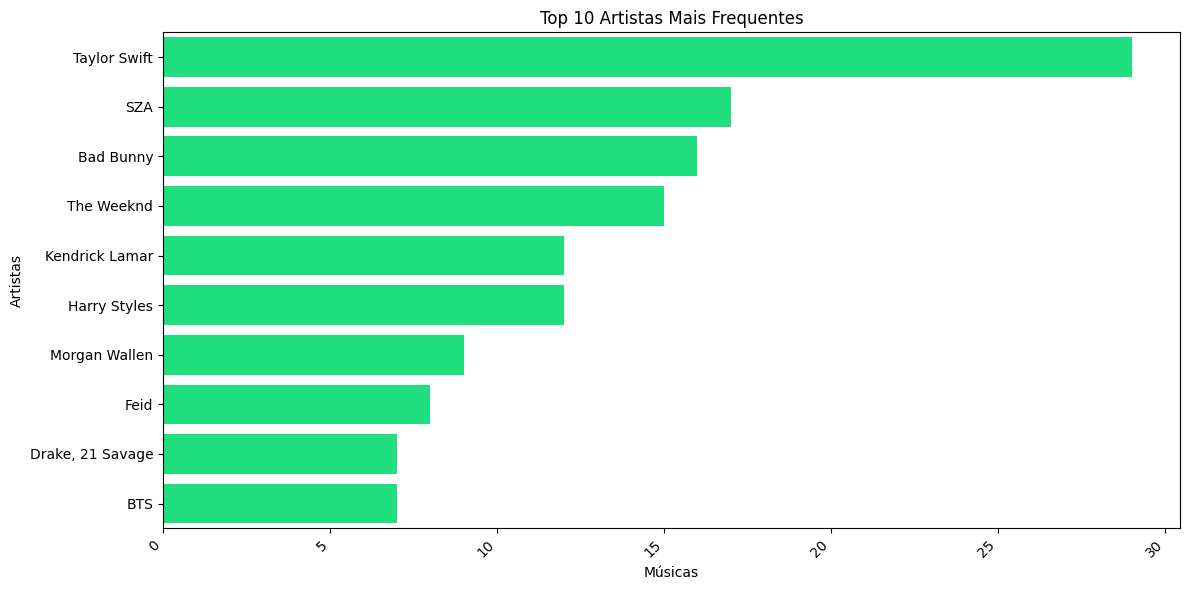

In [64]:
# atribui a lista anterior a variável
top10Artistas = spotify['nomeArtista'].value_counts().head(10).sort_values(ascending=False)

#define tamanho da figura
plt.figure(figsize=(12, 6))

# eixos e cores do gráfico
sns.barplot(x=top10Artistas.values, y=top10Artistas.index, color='springgreen')

# títulos e escritas
plt.title('Top 10 Artistas Mais Frequentes')
plt.xlabel('Músicas')
plt.ylabel('Artistas')

# posicionamento e visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Plotando visualização dos 10 artistas com mais streams

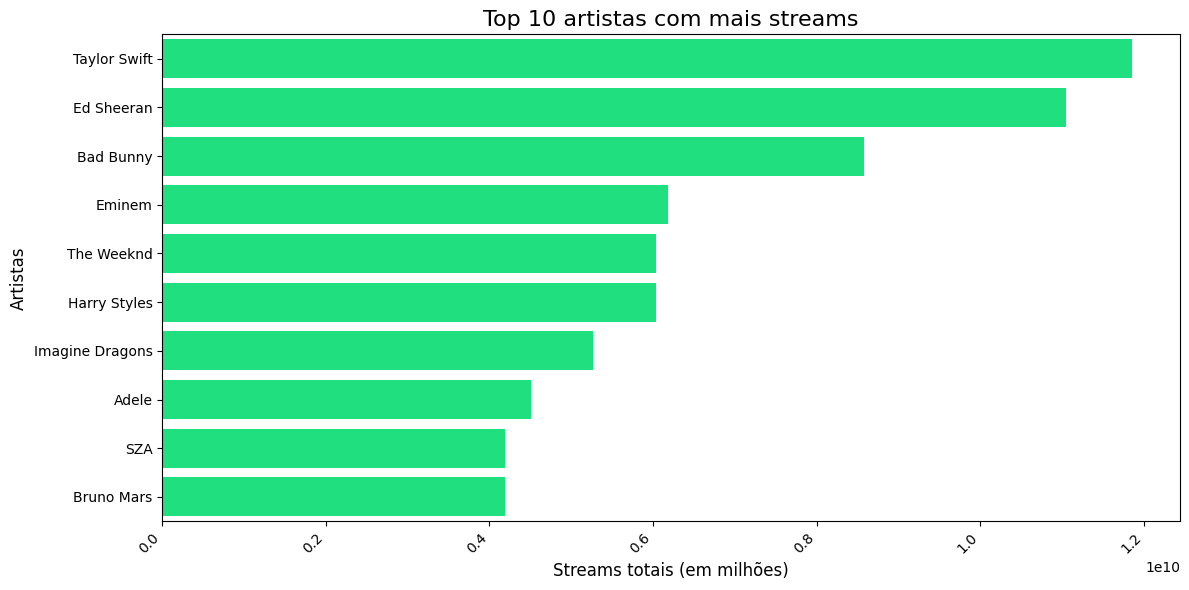

In [69]:
# agrupa pelo nome do artista e soma de streams
artistasStreams = spotify.groupby('nomeArtista')['streams'].sum()

# ordena 10 primeiros artistas por streams em ordem decrescente
top10Streams = artistasStreams.sort_values(ascending=False).head(10)

# determina tamanho do gráfico
plt.figure(figsize=(12, 6))

# eixos e cores do gráfico
sns.barplot(y=top10Streams.index, x=top10Streams.values, order=top10Streams.index, color="springgreen")

# títulos e escritas
plt.title('Top 10 artistas com mais streams', fontsize=16)
plt.xlabel('Streams totais (em milhões)', fontsize=12)
plt.ylabel('Artistas', fontsize=12)

# posicionamento e visualização
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# 4. Plotando visualização dos 10 músicas com mais streams

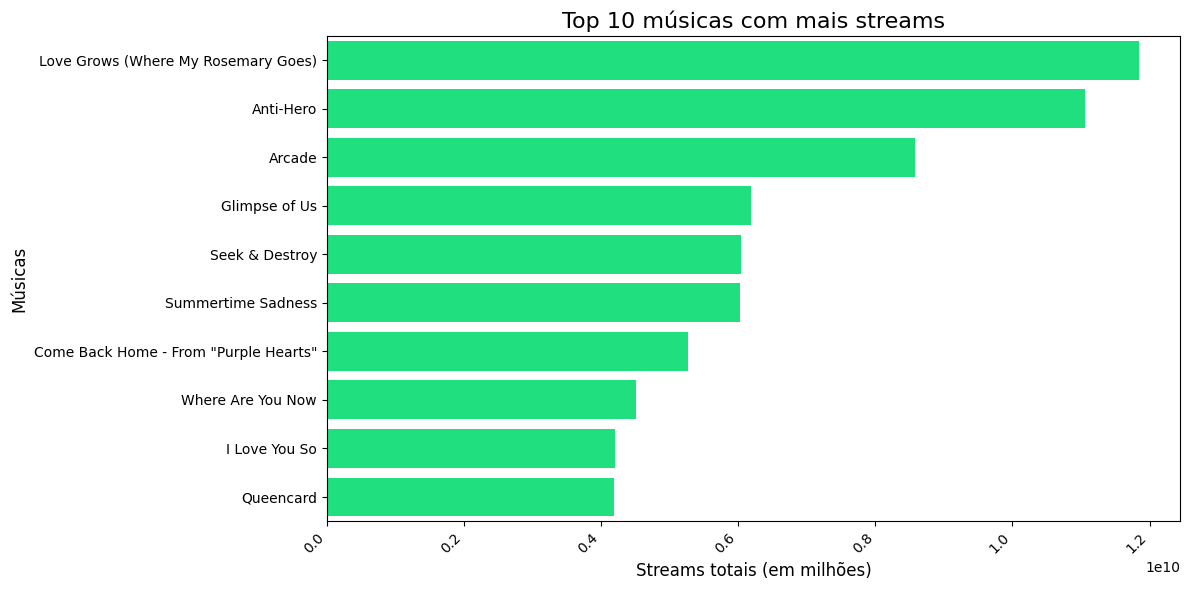

In [88]:
# agrupa pela musica e streams
musicasStreams = spotify.groupby('nomeMusica')['streams'].sum()

# atribui a uma variável os 10 primeiros em ordem decrescente
top10Musicas = musicasStreams.sort_values(ascending=False).head(10)

# determina tamanho do gráfico
plt.figure(figsize=(12, 6))

# cria gráfico
sns.barplot(y=top10Musicas.index, x=top10Streams.values, order=top10Musicas.index, color="springgreen")

# títulos e escritas
plt.title('Top 10 músicas com mais streams', fontsize=16)
plt.xlabel('Streams totais (em milhões)', fontsize=12)
plt.ylabel('Músicas', fontsize=12)

# posicionamento e visualização
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 4. Plotando visualização dos anos de lançamentos das 10 músicas com mais streams

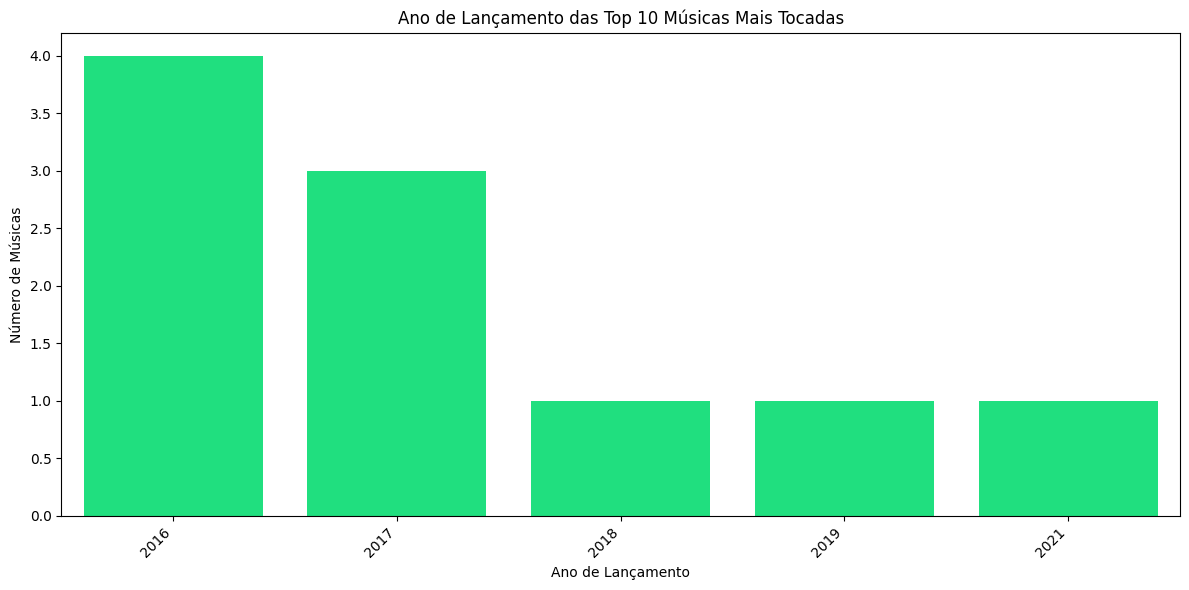

In [78]:
# agrupa pela musica e ano de lançamento
top10MusicasAnos = spotify[spotify['nomeMusica'].isin(top10Musicas.index)][['nomeMusica', 'anoLancamento']].drop_duplicates()

# ordena por ano de lançamento
top10MusicasAnos = top10MusicasAnos.sort_values(by=['anoLancamento'])

# determina tamanho do gráfico
plt.figure(figsize=(12, 6))

# cria gráfico
sns.countplot(x='anoLancamento', data=top10MusicasAnos, order=top10MusicasAnos['anoLancamento'].value_counts().index, color='springgreen')

# títulos e escritas
plt.title('Ano de Lançamento das Top 10 Músicas Mais Tocadas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Músicas')

# posicionamento e visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()